<a href="https://colab.research.google.com/github/aksh98/FintechProject/blob/master/NowCasting_StateLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Extra Code - Might be useful

In [0]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# creds = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [0]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# !mkdir -p drive
# !google-drive-ocamlfuse drive  

## Start execution from here 


In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [0]:
# # !pip install -U -q PyDrive
# from google.colab import files
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !ls
# !cd datalab


In [4]:
%cd drive/My Drive/Colab Notebooks
%cd Stanford
# !ls
# %cd ..

/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/Stanford


# Other two datasets
- Employment (1990-now) - using this for now
- Earnings (2006-now)

## National level

In [5]:
nat_emp = pd.read_csv('national_emp_earnings.csv')
nat_emp.shape

(719, 6)

In [6]:
nat_emp.head()

,privatenatlemp,year,month,dl1yprivatenatlemp,weeklynatlearn,dl1yweeklynatlearn
0,44375,1959,1,0.002689,NaN,NaN
1,44571,1959,2,0.018905,NaN,NaN
2,44884,1959,3,0.032956,NaN,NaN
3,45178,1959,4,0.046781,NaN,NaN
4,45396,1959,5,0.055255,NaN,NaN


### Import GoogleTrends from UIClaims Data

In [7]:
datafile = pd.read_csv('GoogleTrends_updated.csv')
datafile.shape

(176, 9)

In [8]:
datafile.tail()

,Month,Employment,Unemployment,Productivity,GDP,Stock market,jobs,UMEX,UIClaims
171,2018-04,74,18,1,4,13,68,127,844405
172,2018-05,71,16,1,4,9,68,134,795365
173,2018-06,71,17,1,3,9,71,132,1069140
174,2018-07,71,18,1,5,9,71,0,878276
175,2018-08,85,16,1,5,11,81,0,714288


In [0]:
X_nat_emp = datafile[['Unemployment','Productivity','GDP','jobs']]

In [0]:
nat_emp = nat_emp[540:716]

In [11]:
nat_emp.tail()

,privatenatlemp,year,month,dl1yprivatenatlemp,weeklynatlearn,dl1yweeklynatlearn
711,126130,2018,4,0.018582,926.66998,0.029347
712,126390,2018,5,0.019324,929.42999,0.030844
713,126582,2018,6,0.019064,933.84998,0.033775
714,126719,2018,7,0.018625,933.91998,0.030703
715,126986,2018,8,0.019067,937.37000,0.032550


In [0]:
Y_nat_emp = nat_emp['privatenatlemp']

In [0]:
# nat_emp.drop(nat_emp.tail(1).index,inplace = True)
Y_nat_emp.shape, X_nat_emp.shape

((176,), (176, 4))

## State level data processing

In [0]:
state_full = pd.read_csv('state_emp_earnings.csv')

In [0]:
# state_emp = state_earnings[:346] #168+178
state_full.tail()

,year,month,employment,weeklyearn,st,dl1yweeklyearn,dl1yemployment
17692,2018,7,217.6,816.656686,56,0.013220,0.000000
17693,2018,8,217.9,821.202676,56,0.005567,0.001379
17694,2018,9,219.1,855.256502,56,0.041468,0.005507
17695,2018,10,219.7,831.541237,56,-0.027729,0.002738
17696,2018,11,221.6,853.533063,56,0.026447,0.008648


In [0]:
#extra
state_ex = state_full[168:344]
state_ex.head()

,year,month,employment,weeklyearn,st,dl1yweeklyearn,dl1yemployment
168,2004,1,1537.4,NaN,1,NaN,0.003459
169,2004,2,1540.8,NaN,1,NaN,0.002212
170,2004,3,1542.4,NaN,1,NaN,0.001038
171,2004,4,1547.1,NaN,1,NaN,0.003047
172,2004,5,1549.8,NaN,1,NaN,0.001745


In [0]:
#extra
state_ex2 = state_full[347+168:347+344]
state_ex2.head()

,year,month,employment,weeklyearn,st,dl1yweeklyearn,dl1yemployment
515,2004,1,220.7,NaN,2,NaN,0.005925
516,2004,2,219.7,NaN,2,NaN,-0.004531
517,2004,3,220.8,NaN,2,NaN,0.005007
518,2004,4,221.4,NaN,2,NaN,0.002717
519,2004,5,222.0,NaN,2,NaN,0.002710


In [0]:
state_ex.shape,state_ex2.shape

((176, 7), (176, 7))

In [0]:
state_full = state_full['employment']

In [0]:
state_emp = [0 for i in range(52)]
for i in range(52):
  state_emp[i] = state_full[(i*347)+168:((i)*347)+344]
  print(state_emp[i].shape,(i*347)+168)

(176, 7) 168
(176, 7) 515
(176, 7) 862
(176, 7) 1209
(176, 7) 1556
(176, 7) 1903
(176, 7) 2250
(176, 7) 2597
(176, 7) 2944
(176, 7) 3291
(176, 7) 3638
(176, 7) 3985
(176, 7) 4332
(176, 7) 4679
(176, 7) 5026
(176, 7) 5373
(176, 7) 5720
(176, 7) 6067
(176, 7) 6414
(176, 7) 6761
(176, 7) 7108
(176, 7) 7455
(176, 7) 7802
(176, 7) 8149
(176, 7) 8496
(176, 7) 8843
(176, 7) 9190
(176, 7) 9537
(176, 7) 9884
(176, 7) 10231
(176, 7) 10578
(176, 7) 10925
(176, 7) 11272
(176, 7) 11619
(176, 7) 11966
(176, 7) 12313
(176, 7) 12660
(176, 7) 13007
(176, 7) 13354
(176, 7) 13701
(176, 7) 14048
(176, 7) 14395
(176, 7) 14742
(176, 7) 15089
(176, 7) 15436
(176, 7) 15783
(176, 7) 16130
(176, 7) 16477
(176, 7) 16824
(176, 7) 17171
(176, 7) 17518
(0, 7) 17865


In [0]:
state_emp[50].tail()

,year,month,employment,weeklyearn,st,dl1yweeklyearn,dl1yemployment
17689,2018,4,216.6,814.629414,56,0.030957,0.004638
17690,2018,5,216.7,801.295284,56,-0.016368,0.000462
17691,2018,6,217.6,806.001455,56,0.005873,0.004153
17692,2018,7,217.6,816.656686,56,0.013220,0.000000
17693,2018,8,217.9,821.202676,56,0.005567,0.001379


In [0]:
state_emp[50].shape

(176,)

In [0]:
print(state_emp[0][1]," = " ,state_full[1],"-->" ,state_emp[1].shape)

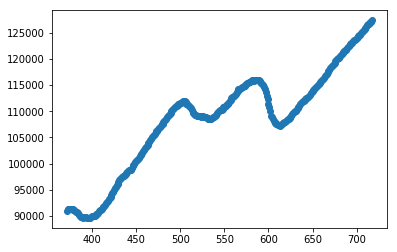

In [0]:
plt.scatter(x = nat_emp.index, y = nat_emp['privatenatlemp'])

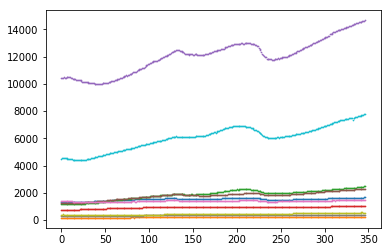

In [0]:
for i in range(10):
  plt.scatter(x = state_emp[i].index - i*347, y = state_emp[i], s=0.5)
  

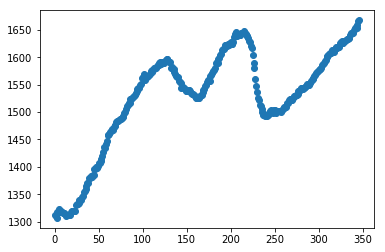

In [0]:
plt.scatter(x = state_emp[0].index, y = state_emp[0])

### State level Google Trends from UIClaims Data

In [0]:
nat_earnings = nat_earnings['privatenatlemp']
# state_earnings = state_earnings['employment']

(146, 1) (200, 1)
(200,) (146,)
Coefficients: 
 [0.01141008]
Mean squared error: 5858.51
Variance score: -0.96


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


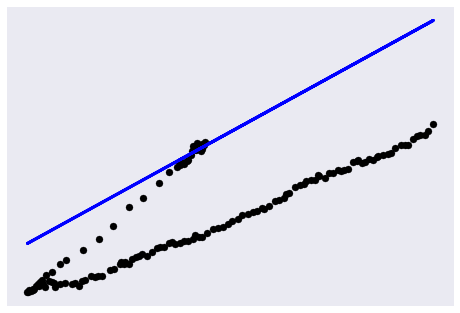

In [0]:
## ============================================================
# Run regression to map the two ->> state and the national data 
## ============================================================

import sklearn
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


state_earnings_train = state_earnings[:200]
state_earnings_test = state_earnings[200:]

nat_earnings_train = nat_earnings[:200]
nat_earnings_test = nat_earnings[200:]

nat_earnings_train = nat_earnings_train.reshape(-1,1)
nat_earnings_test = nat_earnings_test.reshape(-1,1)

print(nat_earnings_test.shape,nat_earnings_train.shape)

regr = linear_model.LinearRegression()

print(state_earnings_train.shape,state_earnings_test.shape)



regr.fit(nat_earnings_train, state_earnings_train)

# Make predictions using the testing set
y_pred = regr.predict(nat_earnings_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(state_earnings_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(state_earnings_test, y_pred))

# Plot outputs

# plt.scatter(nat_earnings, state_earnings,  color='black')
# plt.plot(nat_earnings, np.concatenate((state_earnings_train,y_pred),axis=0), color='blue', linewidth=3)
plt.scatter(nat_earnings_test, state_earnings_test,  color='black')
plt.plot(nat_earnings_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

(422, 1) (20, 1)
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


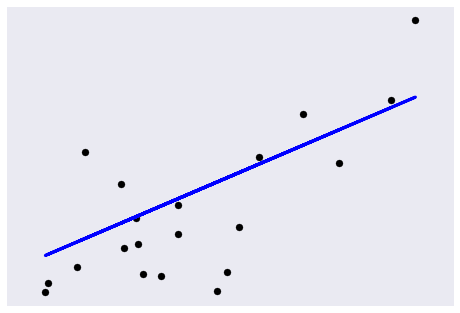

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print(diabetes_X_train.shape,diabetes_X_test.shape)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


# UIClaims Data
## Preprocessing of National Level data 

In [0]:
datafile = pd.read_csv('GoogleTrends_updated.csv')
datafile.shape

(176, 9)

In [0]:
# datafile.shape[0]
datafile.tail()

,Month,Employment,Unemployment,Productivity,GDP,Stock market,jobs,UMEX,UIClaims
171,2018-04,74,18,1,4,13,68,127,844405
172,2018-05,71,16,1,4,9,68,134,795365
173,2018-06,71,17,1,3,9,71,132,1069140
174,2018-07,71,18,1,5,9,71,0,878276
175,2018-08,85,16,1,5,11,81,0,714288


In [0]:
datafile.head()

,Month,Employment,Unemployment,Productivity,GDP,Stock market,jobs,UMEX,UIClaims
0,2004-01,99,21,2,4,9,58,128,2510035
1,2004-02,92,20,2,5,9,52,111,1445179
2,2004-03,92,17,2,5,7,53,100,1252312
3,2004-04,94,17,2,5,8,53,107,1303639
4,2004-05,92,16,2,4,8,56,110,1471092


In [0]:
datafile['UIClaims']

In [0]:
datafile.drop(datafile.tail(2).index,inplace=True)

In [0]:
print(datafile['UIClaims'].max())
print(datafile['UIClaims'].min()) #3755055 #714288

3755055
795365


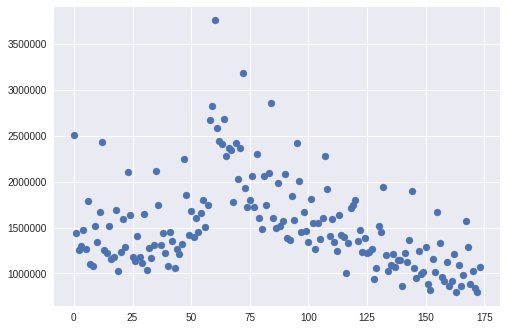

In [0]:
plt.scatter(x = datafile.index, y = datafile['UIClaims'])

In [0]:
# Normalize the UIClaims
datafile["UIClaims"]=((datafile["UIClaims"]-datafile["UIClaims"].min())/(datafile["UIClaims"].max()-datafile["UIClaims"].min()))*100

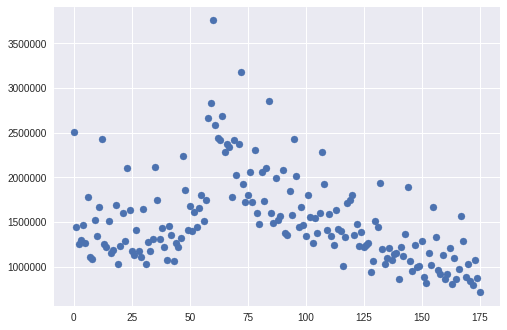

In [0]:
plt.scatter(x = datafile.index, y = datafile['UIClaims'])

In [0]:
datafile.tail()

,Month,Employment,Unemployment,Productivity,GDP,Stock market,jobs,UMEX,UIClaims
171,2018-04,74,18,1,4,13,68,127,844405
172,2018-05,71,16,1,4,9,68,134,795365
173,2018-06,71,17,1,3,9,71,132,1069140
174,2018-07,71,18,1,5,9,71,0,878276
175,2018-08,85,16,1,5,11,81,0,714288


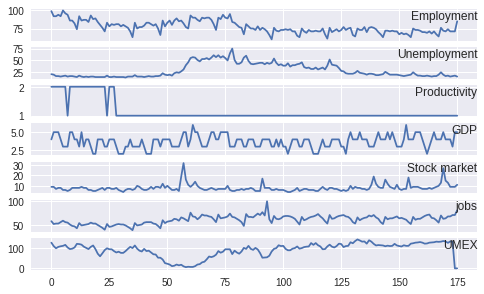

In [0]:
from matplotlib import pyplot
from pandas import concat


pyplot.figure()

for i in range(1,8):
  pyplot.subplot(8,1,i+1)
  pyplot.plot(datafile.values[:,i])
  pyplot.title(datafile.columns[i],y=0.5,loc='right')

pyplot.show()  

In [0]:
# columns = ['Month',	'Employment',	'Unemployment',	'Productivity',	'GDP',	'Stock market',	'jobs','UMEX','UIClaims']
datafile.drop(['Month','Employment','Stock market'],inplace = True, axis=1)
datafile.drop(['UMEX'],inplace = True, axis=1)

datafile.tail()

,Unemployment,Productivity,GDP,jobs,UIClaims
171,18,1,4,68,844405
172,16,1,4,68,795365
173,17,1,3,71,1069140
174,18,1,5,71,878276
175,16,1,5,81,714288


In [0]:
# Y = datafile['UMEX']
Y = datafile['UIClaims']
# X = datafile[['Employment','Unemployment','Productivity','GDP','Stock market','jobs']]
X = datafile[['Unemployment','Productivity','GDP','jobs']]

X.head()
print(X.shape, Y.shape)


(176, 4) (176,)


## Preprocessing of state level Data

In [0]:
datafie = pd.read_csv('googletrends_bls_state.csv')
datafie

,State,Month,Year,UIClaims,Employment,Productivity,GDP,Jobs
0,AL,1,2004,47732,5,2,1,92
1,AL,2,2004,18684,5,1,4,90
2,AL,3,2004,17610,5,2,0,93
3,AL,4,2004,17641,7,1,1,91
4,AL,5,2004,23537,5,0,2,93
5,AL,6,2004,17522,4,1,0,95
6,AL,7,2004,30988,2,0,0,98
7,AL,8,2004,15290,3,1,0,96
8,AL,9,2004,19310,4,1,1,94
9,AL,10,2004,28724,6,0,2,92


In [0]:
st1 = datafie.iloc[0:174]

In [0]:
st2 = datafie.iloc[175:175+173]
st3 = datafie.iloc[175+174:175+174+173]
st4 = datafie.iloc[523:523+173]

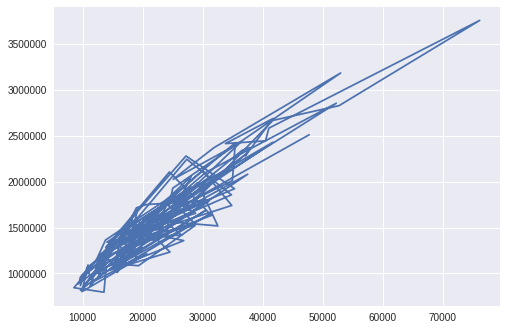

In [0]:
plt.plot(st1['UIClaims'],datafile)

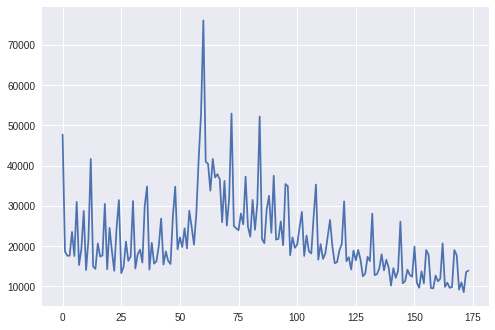

In [0]:
plt.plot(st1.index,st1['UIClaims'])

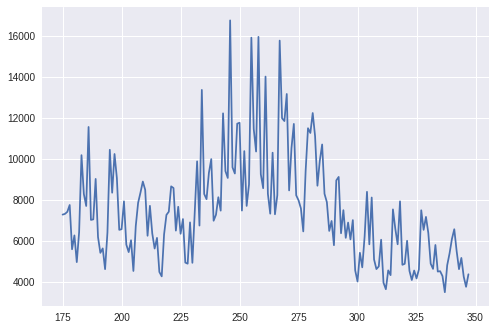

In [0]:
plt.plot(st2.index,st2['UIClaims'])

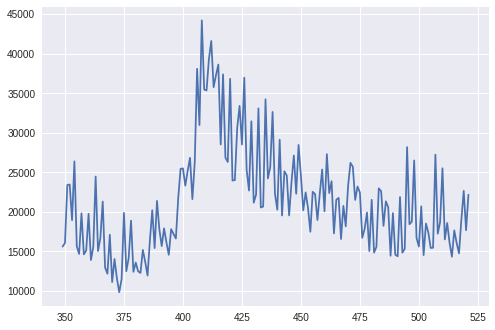

In [0]:
plt.plot(st3.index,st3['UIClaims'])

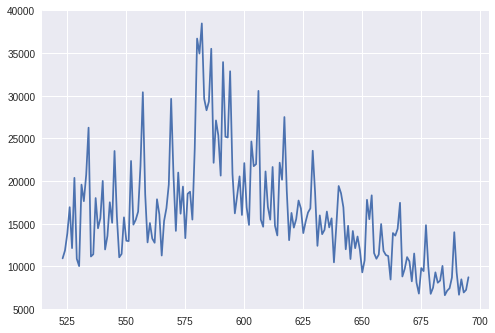

In [0]:
plt.plot(st4.index,st4['UIClaims'])

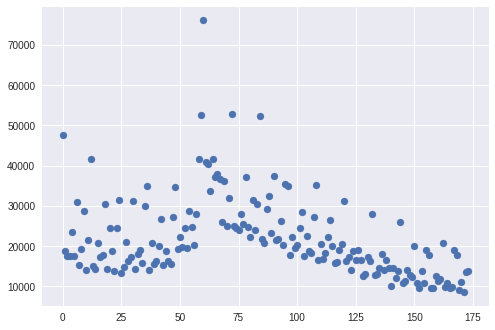

In [0]:
plt.scatter(x = st1.index, y = st1['UIClaims'])

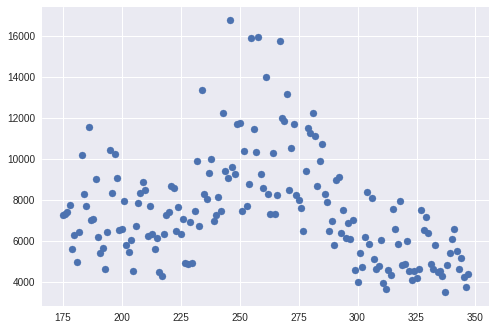

In [0]:
plt.scatter(x = st2.index, y = st2['UIClaims'])

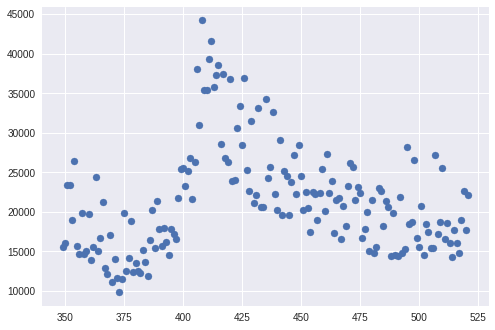

In [0]:
plt.scatter(x = st3.index, y = st3['UIClaims'])

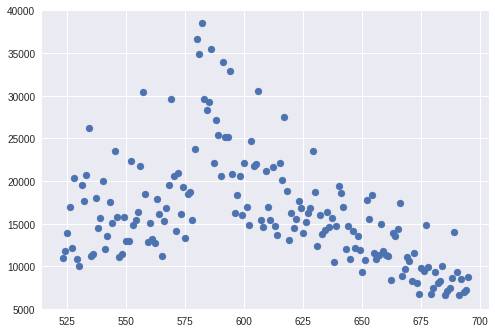

In [0]:
plt.scatter(x = st4.index, y = st4['UIClaims'])

In [0]:
datafie["UIClaims"]=((datafie["UIClaims"]-datafie["UIClaims"].min())/(datafie["UIClaims"].max()-datafie["UIClaims"].min()))*100

In [0]:
# # Data size - 51(states) x 697 observations        697 = 174*4+1()
# datafie = pd.read_csv('trends_state_4.csv')
# datafie.shape
# states = datafie.iloc[:,0]
# datafie.drop(datafie.columns[0],inplace = True, axis=1)
# print(datafie.shape)
# datafie.head()

datafie = pd.read_csv('googletrends_bls_state.csv')
# datafie.shape
# states = datafie.iloc[:,0]
datafie.drop(datafie.columns[0],inplace = True, axis=1)
datafie.drop(datafie.columns[0],inplace = True, axis=1)
datafie.drop(datafie.columns[0],inplace = True, axis=1)
print(datafie.shape)
datafie.head()



(8874, 5)


,UIClaims,Employment,Productivity,GDP,Jobs
0,47732,5,2,1,92
1,18684,5,1,4,90
2,17610,5,2,0,93
3,17641,7,1,1,91
4,23537,5,0,2,93


In [0]:
matrix = datafie.as_matrix()
matrix.shape
matrix = matrix[:697,:]
matrix[0]=((matrix[0]-matrix[0].min())/(matrix[0].max()-matrix[0].min()))*100
# matrix = np.reshape(matrix,(51*174,5))
# print(np.reshape(matrix,(51*174,5)))
print(matrix.shape)
Y_test = matrix[:,:1]
X_test = matrix[:,1:]
print(X_test.shape,Y_test.shape)

(697, 5)
(697, 4) (697, 1)


In [0]:
# X_test = datafie[['Employment','Productivity','GDP','Jobs']]
# Y_test = datafie[['UIClaims']]
# # mat = pd.DataFrame(matrix, columns = ['Employment','Productivity','GDP','Jobs'])
# # Y_test = pd.DataFrame(matrix,columns = ['UIClaims'])
# Y_test = pd.DataFrame(Y_test)
# X_test = pd.DataFrame(X_test)
# print(X_test.head())
# # Y_test.head()
# print(X_test.shape,Y_test.shape)

   Employment  Productivity  GDP  Jobs
0           5             2    1    92
1           5             1    4    90
2           5             2    0    93
3           7             1    1    91
4           5             0    2    93
(8874, 4) (8874, 1)


In [0]:
X_test.type

AttributeError: ignored

In [0]:
test_y = np.reshape(Y,(1,:))

# Clean UIClaims_State_data 
- stored in googletrends_bls_state

In [0]:
!pip3 install xlrd

In [0]:
!ls

 2d_4_17.csv			  googletrends_state.gsheet
 2dout.csv			  GoogleTrends_updated.csv
 3d_4_17.csv			  OES_2_00_17
 bls_state_uiclaims.xlsx	  OES_3_00_17
 Codes				  output.xlsx
 Extra_Data_NotForUse		  outt.xlsx
 final_predicted.gsheet		  predicted.csv
 final_predicted.xlsx		  predicted.xlsx
'Fintech Project Proposal.docx'  'Task Statements (1).txt'
 GoogleTrendsData.csv		  trends_state_4.csv
 GoogleTrendsData.gsheet	  trends_state_4.xlsx
 googletrends_state.csv		  umichigan_allsentiment_clean.csv


In [0]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
 
df = pd.read_excel('bls_state_uiclaims.xlsx', sheetname='cleaned')
 
print("Column headings:")
print(df.columns)

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


Column headings:
Index(['state', 'month', 'year', 'claims', 'continuedunemp', 'covered',
       'unemployment', 'st'],
      dtype='object')


In [0]:
df.head()

,state,month,year,claims,continuedunemp,covered,unemployment,st
0,AL,1,2004,47732,42605.6,1800000,2.3980,1
1,AL,2,2004,18684,35146.8,1800000,1.9775,1
2,AL,3,2004,17610,32399.5,1800000,1.8250,1
3,AL,4,2004,17641,30343.8,1800000,1.7100,1
4,AL,5,2004,23537,29670.6,1800000,1.6720,1


In [0]:
df.drop(['continuedunemp','covered','unemployment','st'], inplace=True, axis=1)

In [0]:
df.shape

(9078, 4)

In [0]:
df.tail()

,state,month,year,claims
9073,WY,6,2018,1401
9074,WY,7,2018,942
9075,WY,8,2018,856
9076,WY,9,2018,1181
9077,WY,10,2018,290


In [0]:
df.iloc[9434,2] == 2018

True

In [0]:
df.dropna(inplace=True)
arr = [[0]*3 for i in range(8874)] # (12*14+6)*51 = 174*51
arr = np.array(arr)
# print(arr.shape)
a = ['0' for i in range(8874)]
c = 0
for i in range(9078):
  if(df.iloc[i,2] == 2018):
    if(c>8840):
      print(c,i)
    if(df.iloc[i,1] < 7):
#       arr[c][0] = df.iloc[i,0]
      a[c] = df.iloc[i,0]
      arr[c][0] = df.iloc[i,1]
      arr[c][1] = df.iloc[i,2]
      arr[c][2] = df.iloc[i,3]
      c+=1
      
  else:
#     print(df.iloc[i,0],i)
#     arr[c][0] = df.iloc[i,0]
    if(c>8840):
      print(c,i)
    a[c] = df.iloc[i,0]
    
    arr[c][0] = df.iloc[i,1]
    arr[c][1] = df.iloc[i,2]
    arr[c][2] = df.iloc[i,3]
    c+=1

In [0]:
print(arr)

[[    1  2004 47732]
 [    2  2004 18684]
 [    3  2004 17610]
 ...
 [    4  2018  1563]
 [    5  2018  1058]
 [    6  2018  1401]]


In [0]:
a = np.array(a)
print(a.shape,arr.shape) # 1,8874
a = a.reshape(-1,1)
print(a.shape,arr.shape) # 1,8874

(8874, 1) (8874, 3)
(8874, 1) (8874, 3)


In [0]:
import numpy as np
ppop = np.hstack((a,arr))

# newar = np.concatenate((arr, a.T), axis=1)

In [0]:
print(ppop)

[['AL' '1' '2004' '47732']
 ['AL' '2' '2004' '18684']
 ['AL' '3' '2004' '17610']
 ...
 ['WY' '4' '2018' '1563']
 ['WY' '5' '2018' '1058']
 ['WY' '6' '2018' '1401']]


In [0]:
pp = np.hstack((ppop,matrix))


In [0]:
print(pp)

[['AL' '1' '2004' ... '2' '1' '92']
 ['AL' '2' '2004' ... '1' '4' '90']
 ['AL' '3' '2004' ... '2' '0' '93']
 ...
 ['WY' '4' '2018' ... '0' '1' '95']
 ['WY' '5' '2018' ... '0' '0' '95']
 ['WY' '6' '2018' ... '0' '0' '95']]


In [0]:
!pip install openpyxl

    100% |████████████████████████████████| 174kB 7.8MB/s 
  Running setup.py bdist_wheel for openpyxl ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/95/b0/38/e5d13093b588f87177df648c06d07d4b7221f2c17d544cde4c
  Running setup.py bdist_wheel for et-xmlfile ... - done
  Stored in directory: /root/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built openpyxl et-xmlfile


In [0]:
myar = pd.DataFrame(pp)
filepath = 'googletrends_bls.xlsx'
myar.to_excel(filepath, index=False)

----
----

# **Training Models**
---

## Training & Testing on National Level Data 

** 1. Training (X_train,Y_train) -> National Level Data = 100 x 4 , 100 x 1 **

** 2. Testing (X_test,Y_test) -> National Level data  =  73 x 4 , 73 x 1 **


In [0]:
#====================================================
##          Long Short Term Memory Data Preparation
#====================================================

# source: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

from sklearn.preprocessing import MinMaxScaler


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

values = datafile.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning

reframed = series_to_supervised(scaled, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)
1   0.114754        1.0       0.50   0.311475   0.579341  0.098361
2   0.098361        1.0       0.75   0.213115   0.219555  0.049180
3   0.049180        1.0       0.75   0.229508   0.154390  0.049180
4   0.049180        1.0       0.75   0.229508   0.171732  0.032787
5   0.032787        1.0       0.50   0.278689   0.228310  0.049180


In [0]:
values = reframed.values
train = values[:100,:]
test = values[100:,:]
train_x,train_y = train[:,:-1],train[:,-1]
test_x,test_y = test[:,:-1],test[:,-1]

train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0],1,test_x.shape[1]))

print(test_x.shape, test_y.shape, train_x.shape, train_y.shape)

(73, 1, 5) (73,) (100, 1, 5) (100,)


Using TensorFlow backend.


(73, 1, 5) (73,) (100, 1, 5) (100,)
Train on 100 samples, validate on 73 samples
Epoch 1/200
 - 1s - loss: 0.2705 - val_loss: 0.1429
Epoch 2/200
 - 0s - loss: 0.2345 - val_loss: 0.1182
Epoch 3/200
 - 0s - loss: 0.2234 - val_loss: 0.1100
Epoch 4/200
 - 0s - loss: 0.2100 - val_loss: 0.1085
Epoch 5/200
 - 0s - loss: 0.1948 - val_loss: 0.1089
Epoch 6/200
 - 0s - loss: 0.1795 - val_loss: 0.1106
Epoch 7/200
 - 0s - loss: 0.1637 - val_loss: 0.1132
Epoch 8/200
 - 0s - loss: 0.1470 - val_loss: 0.1172
Epoch 9/200
 - 0s - loss: 0.1292 - val_loss: 0.1238
Epoch 10/200
 - 0s - loss: 0.1115 - val_loss: 0.1344
Epoch 11/200
 - 0s - loss: 0.0977 - val_loss: 0.1467
Epoch 12/200
 - 0s - loss: 0.0962 - val_loss: 0.1429
Epoch 13/200
 - 0s - loss: 0.0936 - val_loss: 0.1307
Epoch 14/200
 - 0s - loss: 0.0927 - val_loss: 0.1230
Epoch 15/200
 - 0s - loss: 0.0914 - val_loss: 0.1218
Epoch 16/200
 - 0s - loss: 0.0887 - val_loss: 0.1201
Epoch 17/200
 - 0s - loss: 0.0873 - val_loss: 0.1157
Epoch 18/200
 - 0s - loss: 

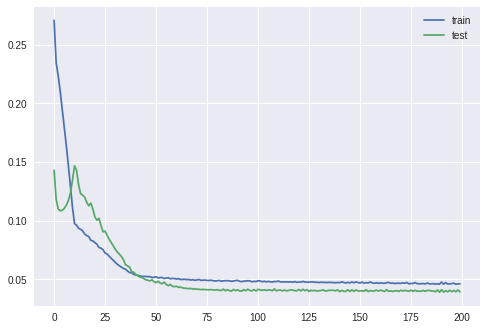

(73, 1, 5)
Test RMSE : 3.361



In [0]:
#====================================================
##          Long Short Term Memory
#====================================================

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#--------------------------
values = reframed.values
train = values[:100,:]
test = values[100:,:]
train_x,train_y = train[:,:-1],train[:,-1]
test_x,test_y = test[:,:-1],test[:,-1]

train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0],1,test_x.shape[1]))

print(test_x.shape, test_y.shape, train_x.shape, train_y.shape)
#====================================================
##          Long Short Term Memory MODEL       ----
#====================================================

model = Sequential()
model.add(LSTM(200, input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam')
# fit network
history = model.fit(train_x,train_y,epochs=200,batch_size=16, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# plot
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

#====================================================
##          Long Short Term Memory Prediction
#====================================================
from sklearn.metrics import mean_squared_error
from numpy import concatenate
from math import sqrt

print(test_x.shape)

yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_x[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_x[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE : %.3f' % rmse)
print("")
#====================================================
##          LSTM Model End
#====================================================


## Training on National Level and testing on state level
** 1. Training (X,Y) -> National Level Data = 173 x 4 , 173 x 1 **

** 2. Testing (mat) -> State Level data  =  8874 x 4 **



In [0]:
#====================================================
##          Long Short Term Memory Data Preparation
#====================================================

# source: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

from sklearn.preprocessing import MinMaxScaler


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# changed datafile to X
values = X.values
# val = X_test.values
val = X_test
# ensure all data is float
values = values.astype('float32')
val = val.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scald = scaler.fit_transform(val)
print("-- ",val.shape,values.shape,scald.shape,scaled.shape)
# frame as supervised learning
# print(scaled)
reframed = series_to_supervised(scaled, 1)
reframd = series_to_supervised(scald, 1)
print(reframed.shape,reframd.shape)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
reframd.drop(reframd.columns[[5,6,7]],axis=1,inplace=True)

# reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())
print(reframd.head())

print(reframed.shape,reframd.shape,X.shape,Y.shape,Y_test.shape)


--  (697, 4) (174, 4) (697, 4) (174, 4)
(173, 8) (696, 8)
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.114754        1.0       0.50   0.311475  0.098361
2   0.098361        1.0       0.75   0.213115  0.049180
3   0.049180        1.0       0.75   0.229508  0.049180
4   0.049180        1.0       0.75   0.229508  0.032787
5   0.032787        1.0       0.50   0.278689  0.049180
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.000000       0.00       0.00   0.000000  0.227273
2   0.227273       0.25       1.00   0.918367  0.227273
3   0.227273       0.50       0.00   0.948980  0.318182
4   0.318182       0.25       0.25   0.928571  0.227273
5   0.227273       0.00       0.50   0.948980  0.181818
(173, 5) (696, 5) (174, 4) (174,) (697, 1)


In [0]:
!pip install openpyxl


    100% |████████████████████████████████| 174kB 7.2MB/s 
  Running setup.py bdist_wheel for openpyxl ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/95/b0/38/e5d13093b588f87177df648c06d07d4b7221f2c17d544cde4c
  Running setup.py bdist_wheel for et-xmlfile ... - done
  Stored in directory: /root/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built openpyxl et-xmlfile


In [0]:
values = reframed.values
val = reframd.values
# values = reframed
# val = reframd
# (174, 4) (174,)
# train = values
# test = val
train = values[:,:]
test = val[:,:]
train_x,train_y = train,Y[1:]
test_x = test
test_y = Y_test[1:]
train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0],1,test_x.shape[1]))
# Y_test = Y_test.values

test_y = test_y.reshape((test_y.shape[0],1))
# np.asarray(test_y)

print("Test_x = ",test_x.shape," \nTrain_x = ", train_x.shape,"\nTrain_y = ", train_y.shape,"\nTest_y ",test_y.shape)

# (73, 1, 5) (73,) (100, 1, 5) (100,)

Test_x =  (696, 1, 5)  
Train_x =  (173, 1, 5) 
Train_y =  (173,) 
Test_y  (696, 1)


In [0]:
# test_y.type

Epoch 1/200
173/173 [==============================] - 1s 8ms/step - loss: -2.3927 - acc: 0.0000e+00
Epoch 2/200
173/173 [==============================] - 0s 503us/step - loss: -7.9581 - acc: 0.0000e+00
Epoch 3/200
173/173 [==============================] - 0s 519us/step - loss: -13.9877 - acc: 0.0000e+00
Epoch 4/200
173/173 [==============================] - 0s 495us/step - loss: -21.0539 - acc: 0.0000e+00
Epoch 5/200
173/173 [==============================] - 0s 489us/step - loss: -29.6141 - acc: 0.0000e+00
Epoch 6/200
173/173 [==============================] - 0s 489us/step - loss: -39.6469 - acc: 0.0000e+00
Epoch 7/200
173/173 [==============================] - 0s 501us/step - loss: -49.9998 - acc: 0.0000e+00
Epoch 8/200
173/173 [==============================] - 0s 551us/step - loss: -60.7860 - acc: 0.0000e+00
Epoch 9/200
173/173 [==============================] - 0s 507us/step - loss: -73.8390 - acc: 0.0000e+00
Epoch 10/200
173/173 [==============================] - 0s 507us/ste

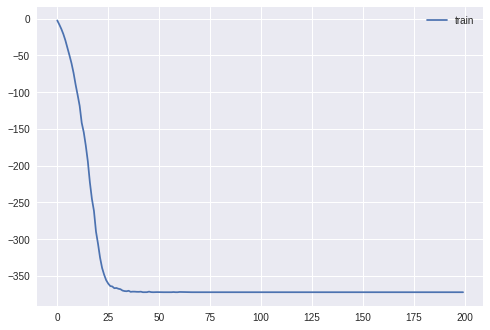

test_x =  (696, 1, 5)
Predicted_y shape =  (696, 1)
Predicted_y shape =  (696, 1) (696, 5)
Predicted shape1 =  (696, 5)
Predicted shape2 =  (696, 5)
Predicted shape3 =  (696,)
-------------------- Test RMSE : 21493.361


In [0]:
#====================================================
##          Long Short Term Memory
#====================================================
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

#====================================================
##          Long Short Term Memory MODEL       ----
#====================================================

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1))
# model.add(Activation('relu'))
# model.compile(loss='mse',optimizer='adam')
model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

# fit network
history = model.fit(train_x,train_y,epochs=200,batch_size=8, verbose=1, shuffle=False)

score = model.evaluate(test_x, test_y, batch_size=8)
print("=> Accuracy Score: ",score)
# plot
pyplot.plot(history.history['loss'],label='train')
# pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

#====================================================
##          Long Short Term Memory Prediction
#====================================================
from sklearn.metrics import mean_squared_error
from numpy import concatenate
from math import sqrt

print( "test_x = ", test_x.shape)

yhat = model.predict(test_x)
print("Predicted_y shape = ",yhat.shape)
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
# invert scaling for forecast
print("Predicted_y shape = ",yhat.shape,test_x.shape)
inv_yhat = concatenate((yhat, test_x[:, 1:]), axis=1)
print("Predicted shape1 = ",inv_yhat.shape)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(inv_yhat)
inv_yhat = scaler.inverse_transform(inv_yhat)
print("Predicted shape2 = ",inv_yhat.shape)
inv_yhat = inv_yhat[:,0]
print("Predicted shape3 = ",inv_yhat.shape)
yhat = pd.DataFrame(yhat)
writer = pd.ExcelWriter('dec18_State_predicted.xlsx')
yhat.to_excel(writer,'sheet1',index=True)
writer.save()  

# invert scaling for actual

test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_x[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('-------------------- Test RMSE : %.3f' % rmse)

#====================================================
##          LSTM Model End
#====================================================


In [0]:
# inv_yhat = scaler.inverse_transform(inv_yhat)
# print("Predicted shape2 = ",inv_yhat.shape)
# inv_yhat = inv_yhat[:,0]
# print("Predicted shape3 = ",inv_yhat.shape)
# yhat = pd.DataFrame(yhat)
# writer = pd.ExcelWriter('dec18_State_predicted.xlsx')
# yhat.to_excel(writer,'sheet1',index=True)
# writer.save()  

# invert scaling for actual

# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_x[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# print(inv_y.shape)
# calculate RMSE

# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('-------------------- Test RMSE : %.3f' % rmse)


In [0]:
from google.colab import files
files.download('predicted_dec18.xlsx') 



# Create Xlsx output file 

In [0]:
## ---------- SEPERATE CODE ----------

t = pd.read_csv('GoogleTrendsData.csv')
t = t.iloc[:,0]
t.drop(t.tail(2).index,inplace=True)
print(t)

In [0]:
print(states)

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

In [0]:
## ----- To be run at last !! --------
print(t.shape,states.shape)
final = pd.DataFrame(columns=['State','Mon-Year']) 
print(final.shape)
for ind,st in states.iteritems():
  for index,times in t.iteritems():
    final = final.append({'State': st,'Mon-Year': times},ignore_index=True)
#     final.append({'Mon-Yr': t.iloc[times], 'State': state.iloc[st]},ignore_index=True) 
#     final.iloc[st+times][0] = 1 #state.iloc[st]
#     final.iloc[st+times][1] = t.iloc[times]
print(final.shape)
## ------------------------------------    

(174,) (51,)
(0, 2)
(8874, 2)


In [0]:
final.head()

,State,Mon-Year
0,Alabama,2004-01
1,Alabama,2004-02
2,Alabama,2004-03
3,Alabama,2004-04
4,Alabama,2004-05


In [0]:
pre = pd.read_csv('predicted.csv')
outp = pd.concat([final,pre], axis=1)

print(outp.shape)

outp.drop(outp.columns[2],inplace = True, axis=1)
outp.head()
print(outp.columns)
outp.rename(columns={'0':'Predicted Value'})

(8874, 4)
Index(['State', 'Mon-Year', '0'], dtype='object')


,State,Mon-Year,Predicted Value
0,Alabama,2004-01,123.107330
1,Alabama,2004-02,122.711288
2,Alabama,2004-03,120.902618
3,Alabama,2004-04,120.615295
4,Alabama,2004-05,126.685089
5,Alabama,2004-06,131.262955
6,Alabama,2004-07,135.224121
7,Alabama,2004-08,130.389679
8,Alabama,2004-09,125.020035
9,Alabama,2004-10,121.931549


In [0]:
writr = pd.ExcelWriter('final_predicted.xlsx')
outp.to_excel(writr,'sheet1',index=True)
writr.save()

from google.colab import files
files.download('final_predicted.xlsx') 


# TODO
Try building a sequential model 
- https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

# Previous Models ---------------------------------------------------------------

DONT Run This Code


In [0]:
values = reframed.values
train = values[:100,:]
test = values[100:,:]
train_x,train_y = train[:,:-1],train[:,-1]
test_x,test_y = test[:,:-1],test[:,-1]

train_x = train_x.reshape((train_x.shape[0],train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0],test_x.shape[1]))

print(test_x.shape, test_y.shape, train_x.shape, train_y.shape)

(73, 7) (73,) (100, 7) (100,)


test_Data  - predicted  - improved
0.35000002  ->  0.36   - 0.41
0.32500005  ->  0.36   - 0.41
0.35000002  ->  0.36   - 0.41
0.27499998  ->  0.36   - 0.42
0.27499998  ->  0.36   - 0.23
0.125  ->  0.36   - 0.23
0.07500005  ->  0.46   - 0.23
0.375  ->  0.46   - 0.46
0.27499998  ->  0.36   - 0.41
0.22500002  ->  0.36   - 0.22
0.32500005  ->  0.36   - 0.20
0.27499998  ->  0.36   - 0.33
0.27499998  ->  0.36   - 0.42
0.30000007  ->  0.36   - 0.40
0.27499998  ->  0.36   - 0.46
0.27499998  ->  0.36   - 0.40
0.375  ->  0.36   - 0.38
0.17500007  ->  0.36   - 0.29
0.024999976  ->  0.46   - 0.43
0.39999998  ->  0.46   - 0.44
0.25  ->  0.36   - 0.39
0.30000007  ->  0.36   - 0.21
0.35000002  ->  0.36   - 0.30
0.27499998  ->  0.36   - 0.32
0.32500005  ->  0.36   - 0.25
0.42500007  ->  0.36   - 0.47
0.32500005  ->  0.36   - 0.41
0.375  ->  0.36   - 0.42
0.39999998  ->  0.36   - 0.33
0.14999998  ->  0.36   - 0.37
0.100000024  ->  0.46   - 0.23
0.375  ->  0.46   - 0.23
0.32500005  ->  0.36   - 0.34
0.32

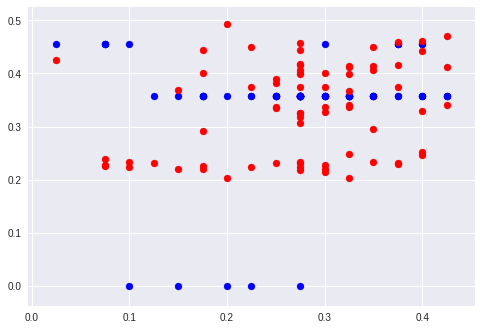

In [0]:
#====================================================
##          Regression Models
#====================================================

rng = np.random.RandomState(1)

# reg = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
# regr_2 = AdaBoostRegressor(SVR(kernel= 'rbf', C= 1e3, gamma= 0.1),
#                           n_estimators=300, random_state=rng)
reg = DecisionTreeRegressor(max_depth=3)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
                          n_estimators=300, random_state=rng)

# reg = LinearRegression()
# reg = SVR(kernel='rbf',)
reg.fit(train_x,train_y)
regr_2.fit(train_x,train_y)

arr = reg.predict(test_x)
arr2 = regr_2.predict(test_x)


# print(reg.coef_)
# print(reg.intercept_)


# tsne = TSNE(n_components=2).fit_transform(X)
# print("tsne shape - ",tsne.shape)
# plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
# plt.title('Testing Data')
# plt.xticks(())
# plt.yticks(())
# plt.plot(test,reg.predict(test_x),color = 'red',linewidth=3)
# plt.show()


test = np.asarray(test_y) # to print


print("test_Data"," - predicted"," - improved")

for i in range(0,len(test_y)):
  print(test[i]," ->  %.2f"%arr[i],"  - %.2f"%arr2[i])

plt.scatter(test,arr,color='blue')
plt.scatter(test,arr2,color='red')
plt.show()

test_Data - predicted - improved
0.35000002  ->  0.35   - 0.27
0.32500005  ->  0.39   - 0.37
0.35000002  ->  0.43   - 0.43
0.27499998  ->  0.43   - 0.42
0.27499998  ->  0.27   - 0.25
0.125  ->  0.24   - 0.19
0.07500005  ->  0.01   - -0.08
0.375  ->  0.41   - 0.49
0.27499998  ->  0.35   - 0.33
0.22500002  ->  0.22   - 0.12
0.32500005  ->  0.20   - 0.05
0.27499998  ->  0.35   - 0.26
0.27499998  ->  0.40   - 0.21
0.30000007  ->  0.40   - 0.17
0.27499998  ->  0.39   - 0.18
0.27499998  ->  0.41   - 0.21
0.375  ->  0.34   - 0.19
0.17500007  ->  0.30   - 0.20
0.024999976  ->  0.33   - 0.18
0.39999998  ->  0.31   - 0.23
0.25  ->  0.30   - 0.22
0.30000007  ->  0.16   - 0.05
0.35000002  ->  0.24   - 0.17
0.27499998  ->  0.34   - 0.27
0.32500005  ->  0.37   - 0.24
0.42500007  ->  0.51   - 0.33
0.32500005  ->  0.54   - 0.46
0.375  ->  0.52   - 0.30
0.39999998  ->  0.60   - 0.47
0.14999998  ->  0.59   - 0.45
0.100000024  ->  0.25   - -0.02
0.375  ->  0.11   - -0.17
0.32500005  ->  0.58   - 0.45
0.3

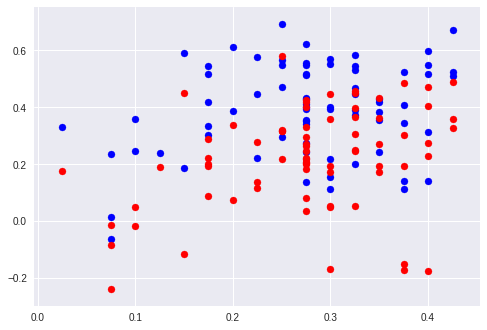

In [0]:
#====================================================
##          Regression Models
#====================================================

rng = np.random.RandomState(1)

reg = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
regr_2 = AdaBoostRegressor(SVR(kernel= 'rbf', C= 1e3, gamma= 0.1),
                          n_estimators=300, random_state=rng)

# reg = LinearRegression()
# reg = SVR(kernel='rbf',)
reg.fit(train_x,train_y)
regr_2.fit(train_x,train_y)

arr = reg.predict(test_x)
arr2 = regr_2.predict(test_x)


# print(reg.coef_)
# print(reg.intercept_)


# tsne = TSNE(n_components=2).fit_transform(X)
# print("tsne shape - ",tsne.shape)
# plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
# plt.title('Testing Data')
# plt.xticks(())
# plt.yticks(())
# plt.plot(test,reg.predict(test_x),color = 'red',linewidth=3)
# plt.show()


test = np.asarray(test_y) # to print


print("test_Data","- predicted","- improved")

for i in range(0,len(test_y)):
  
  #       Test data   ->   Predicted  ->  Improved
  
  print(test[i]," ->  %.2f"%arr[i],"  - %.2f"%arr2[i])

plt.scatter(test,arr,color='blue')
plt.scatter(test,arr2,color='red')
plt.show()

[ 0.59332981  0.17312168  0.11321871 -0.07587026 -0.09662714 -0.28033725
 -0.15072859]
0.3476646481679973
tsne shape -  (174, 2)


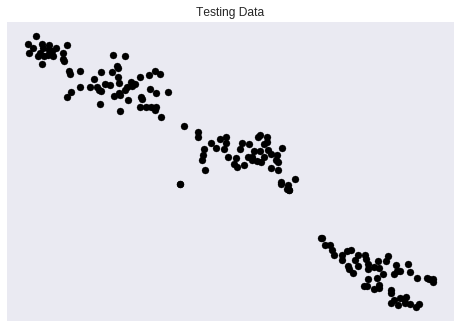

0.35000002  -> 0.34
0.32500005  -> 0.37
0.35000002  -> 0.40
0.27499998  -> 0.38
0.27499998  -> 0.32
0.125  -> 0.33
0.07500005  -> 0.25
0.375  -> 0.30
0.27499998  -> 0.40
0.22500002  -> 0.32
0.32500005  -> 0.27
0.27499998  -> 0.32
0.27499998  -> 0.28
0.30000007  -> 0.30
0.27499998  -> 0.31
0.27499998  -> 0.28
0.375  -> 0.29
0.17500007  -> 0.36
0.024999976  -> 0.28
0.39999998  -> 0.23
0.25  -> 0.39
0.30000007  -> 0.30
0.35000002  -> 0.33
0.27499998  -> 0.33
0.32500005  -> 0.26
0.42500007  -> 0.29
0.32500005  -> 0.35
0.375  -> 0.31
0.39999998  -> 0.30
0.14999998  -> 0.28
0.100000024  -> 0.20
0.375  -> 0.17
0.32500005  -> 0.28
0.32500005  -> 0.26
0.42500007  -> 0.27
0.25  -> 0.31
0.39999998  -> 0.22
0.42500007  -> 0.29
0.39999998  -> 0.31
0.35000002  -> 0.26
0.25  -> 0.26
0.17500007  -> 0.21
0.07500005  -> 0.22
0.30000007  -> 0.18
0.30000007  -> 0.24
0.27499998  -> 0.24
0.30000007  -> 0.24
0.27499998  -> 0.24
0.27499998  -> 0.23
0.17500007  -> 0.23
0.22500002  -> 0.21
0.17500007  -> 0.23
0

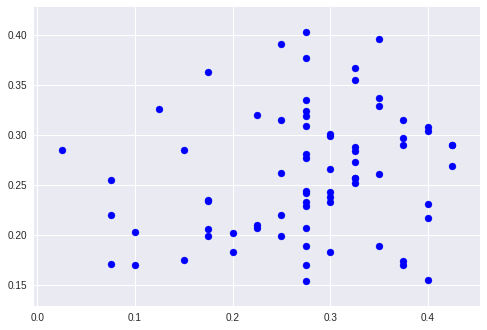

In [0]:
#====================================================
##          Bayesian Ridge Model
#====================================================

regr = linear_model.BayesianRidge()
regr.fit(train_x,train_y)
print(regr.coef_)
print(regr.intercept_)

tsne = TSNE(n_components=2).fit_transform(X)
print("tsne shape - ",tsne.shape)

plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
plt.title('Testing Data')
plt.xticks(())
plt.yticks(())
# plt.plot(Y_test,reg.predict(X_test),color = 'red',linewidth=3)
plt.show()

test = np.asarray(test_y)
arr = regr.predict(test_x)
for i in range(0,len(test_y)):
  print(test[i]," -> %.2f"%arr[i])
  
plt.scatter(test,arr,color='blue')
plt.show()

(174, 6)
tsne shape -  (174, 2)


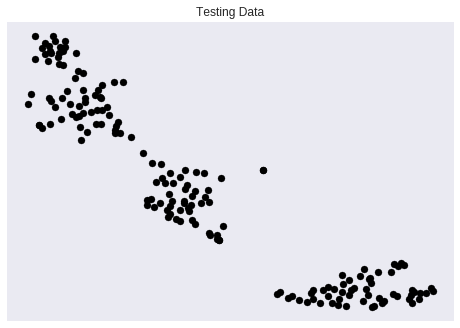

In [0]:
#====================================================
##          Component Reduction
#====================================================

# X.head()
print(X.shape)

tsne = TSNE(n_components=2).fit_transform(X)
print("tsne shape - ",tsne.shape)

plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
plt.title('Testing Data')
plt.xticks(())
plt.yticks(())
plt.show()


In [0]:
# TO-DO

# - LSTM
# - GRU


## Add other datasets

In [0]:
#====================================================
##          Regression Models
#====================================================

rng = np.random.RandomState(1)

reg = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
regr_2 = AdaBoostRegressor(SVR(kernel= 'rbf', C= 1e3, gamma= 0.1),
                          n_estimators=300, random_state=rng)

# reg = LinearRegression()
# reg = SVR(kernel='rbf',)
reg.fit(train_x,train_y)
regr_2.fit(train_x,train_y)

arr = reg.predict(test_x)
arr2 = regr_2.predict(test_x)


# print(reg.coef_)
# print(reg.intercept_)
# tsne = TSNE(n_components=2).fit_transform(X)
# print("tsne shape - ",tsne.shape)
# plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
# plt.title('Testing Data')
# plt.xticks(())
# plt.yticks(())
# plt.plot(test,reg.predict(test_x),color = 'red',linewidth=3)
# plt.show()


test = np.asarray(test_y) # to print

print("test_Data","- predicted","- improved")

for i in range(0,len(test_y)):
  
  #       Test data   ->   Predicted  ->  Improved
  
  print(test[i]," ->  %.2f"%arr[i],"  - %.2f"%arr2[i])

plt.scatter(test,arr,color='blue')
plt.scatter(test,arr2,color='red')
plt.show()